# **importing libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **1**. data collection

In [2]:
df=pd.read_csv("/content/iris_new_save.csv")

# **2**. data cleaning

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df["species"].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


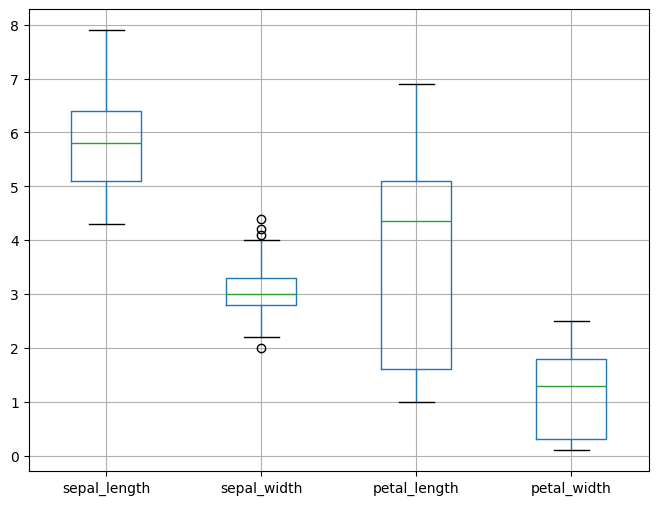

In [6]:
df.boxplot(figsize=(8,6))
plt.show()

# **3**. data pre processing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder



*   encoding







In [20]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [23]:
x = df.drop("species", axis=1)
y = df["species"]

In [24]:
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]




*   splitting dataset




In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



*   feature scalling




In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **4**. model creation

In [28]:
from sklearn.svm import SVC

In [29]:
svm_model = SVC(kernel='rbf', C=0.1, gamma='scale')
svm_model.fit(x_train_scaled, y_train)

SVC(C=0.1)

## 5. **Validating**


In [30]:
y_pred = svm_model.predict(x_test_scaled)

In [31]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Train Accuracy : 0.8833333333333333
Test Accuracy  : 0.9666666666666667


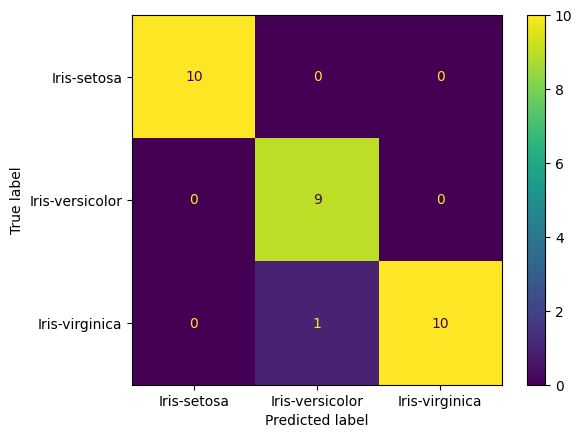

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = svm_model.predict(x_test_scaled)
print("Train Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot()


## 6. **prediction**

In [40]:
sample = [[6.5, 2.8, 4.6, 1.5]]
sample_scaled = scaler.transform(sample)

y_pred_sample = svm_model.predict(sample_scaled)
print("Encoded prediction:", y_pred_sample)
print("Predicted species:", le.inverse_transform(y_pred_sample))



Encoded prediction: [1]
Predicted species: ['Iris-versicolor']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 7. saving the model

In [34]:
import joblib

# Save the trained model
joblib.dump(svm_model, 'svm_iris_model.pkl')
print("Model saved successfully!")


Model saved successfully!
